In [1]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.common.exceptions import NoSuchElementException
from selenium.webdriver.chrome.options import Options
from datetime import datetime
import pandas as pd

options = webdriver.ChromeOptions() 
options.add_argument("--headless")
PATH = "C:\Program Files (x86)\chromedriver.exe"
options.add_experimental_option("excludeSwitches", ["enable-logging"])
driver = webdriver.Chrome(PATH, options=options)

#add url of product you wish to track
URLS={'quartet':'https://www.bookdepository.com/es/QUARTET-INTERMEDIATE-JAPANESE-ACROSS-FOUR-LANGUAGE-SKILLS-TEXTBOOK-Tadashi-Sakamoto/9784789016957?ref=grid-view&qid=1650402192213&sr=1-1',
           "tobira": 'https://www.bookdepository.com/Tobira-Gateway-Advanced-Japanese-Learning-Through-Content-Multimedia-Mayumi-Mayumi/9784874244470',
           'atom habits':'https://www.bookdepository.com/Atomic-Habits-James-Clear/9780735211292?ref=grid-view&qid=1652225324915&sr=1-2',
           'ultralearning':'https://www.bookdepository.com/Ultralearning-Scott-Young/9780062852687?ref=grid-view&qid=1652225190257&sr=1-2',
           'jujutsu anime': 'https://www.bookdepository.com/%E5%91%AA%E8%A1%93%E5%BB%BB%E6%88%A6%E5%85%AC%E5%BC%8F%E3%82%B9%E3%82%BF%E3%83%BC%E3%83%88%E3%82%AC%E3%82%A4%E3%83%89-%E8%8A%A5%E8%A6%8B-%E4%B8%8B%E3%80%85/9784087925586',
           'haikyuu 1': 'https://www.bookdepository.com/%E3%83%8F%E3%82%A4%E3%82%AD%E3%83%A5%E3%83%BC%EF%BC%81%EF%BC%81-1-%E5%8F%A4%E8%88%98-%E6%98%A5%E4%B8%80/9784088704531',
           'jap book': 'https://www.bookdepository.com/%E7%A5%9E%E3%81%AE%E5%AD%90%E3%81%A9%E3%82%82%E3%81%9F%E3%81%A1%E3%81%AF%E3%81%BF%E3%81%AA%E8%B8%8A%E3%82%8B-%E6%9D%91%E4%B8%8A%E6%98%A5%E6%A8%B9/9784101001500',
           'yotsuba':'https://www.bookdepository.com/%E3%82%88%E3%81%A4%E3%81%B0%E3%81%A8%EF%BC%81-%E3%80%88%EF%BC%91%E3%80%89-%E3%81%82%E3%81%9A%E3%81%BE-%E3%81%8D%E3%82%88%E3%81%B2%E3%81%93/9784048690669',
           'spy': 'https://www.bookdepository.com/SPY%C3%97FAMILY-3-%E3%82%B8%E3%83%A3%E3%83%B3%E3%83%97%E3%82%B3%E3%83%9F%E3%83%83%E3%82%AF%E3%82%B9-%E9%81%A0%E8%97%A4-%E9%81%94%E5%93%89/9784088821832?ref=grid-view&qid=1651931455015&sr=1-2',
           'quart work': 'https://www.bookdepository.com/QUARTET-INTERMEDIATE-JAPANESE-ACROSS-FOUR-LANGUAGE-SKILLS-WORKBOOK-Tadashi-Sakamoto/9784789016964?ref=grid-view&qid=1652120765056&sr=1-2'}

driver.implicitly_wait(2)

C:\Users\zubik\AppData\Local\Temp\ipykernel_3404\2657496345.py:12: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(PATH, options=options)


In [2]:
series = pd.Series()
series.name = str(datetime.now())[5:-13] + "hs"

C:\Users\zubik\AppData\Local\Temp\ipykernel_3404\3839793708.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  series = pd.Series()


In [3]:
data = pd.read_excel('book_prices_data.xlsx',index_col=0) #for pre-existing data

for title in URLS:
    
    driver.get(URLS[title])
    
    try:
        price = driver.find_element(by=By.CLASS_NAME, value="list-price")
    except NoSuchElementException:
        price = 0

    try:
        unavailable = driver.find_element(by=By.CLASS_NAME, value="red-text")
        unavailable_var = 1
    except NoSuchElementException:
        unavailable_var = 0

    try:
        sale_price = driver.find_element(by=By.CLASS_NAME, value="sale-price")
    except NoSuchElementException:
        sale_price = 0
    
    if unavailable_var == 1:
        if unavailable.text == 'Currently unavailable':
            series[title] = 0 #unavailable
            continue
    if sale_price != 0:
        series[title] = int(sale_price.text[4:-3].replace('.',''))
    elif price != 0:
        series[title] = int(price.text[:-3].replace('.','').replace('ARS$', '').replace('List price:',''))



In [4]:
dataf = data.append(series)
dataf.to_excel('book_prices_data.xlsx')
driver.close()

C:\Users\zubik\AppData\Local\Temp\ipykernel_3404\166510817.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataf = data.append(series)


Visualization:

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure

sns.set()
data = pd.read_excel('book_prices_data.xlsx',index_col=0)

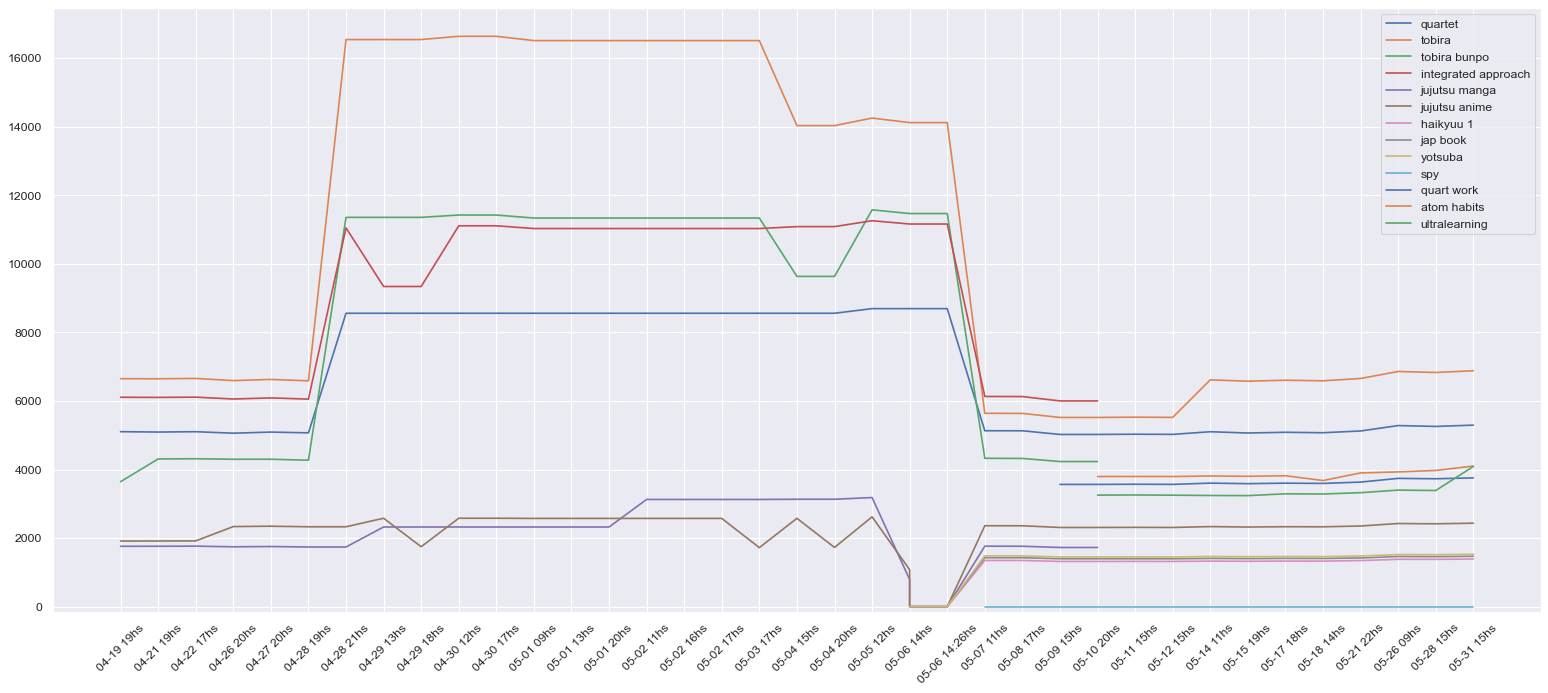

In [6]:
figure(figsize=(24, 10), dpi=80)
plt.plot(data)
plt.legend(data.columns)
plt.xticks(rotation=45)
# plt.yticks([x*300 for x in range(4,60)])
plt.ylim(-150)
plt.show();

In [7]:
# id = list(data.index)
# for x in range(len(id)):
#     id[x] = id[x][:-3] + "hs"
# data.index = id
# data.to_excel('book_prices_data.xlsx')